In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

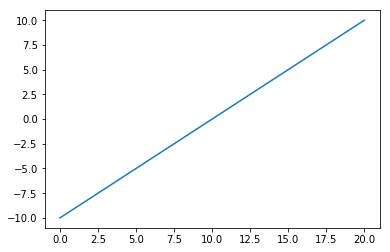

In [32]:
x=np.arange(-10,11)
y=x**2
plt.plot(x)

In [15]:
y

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

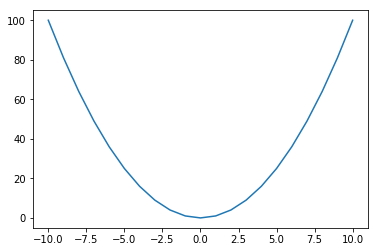

In [16]:
plt.plot(x,y)

# Power rule
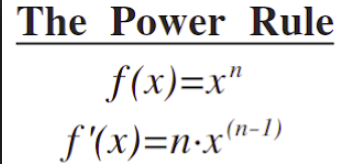

dy/dx = 2x

In [19]:
dy = 2*x

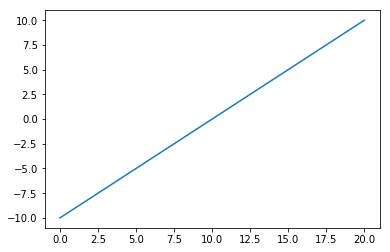

In [21]:
x=np.arange(-10,11)
plt.plot(x)

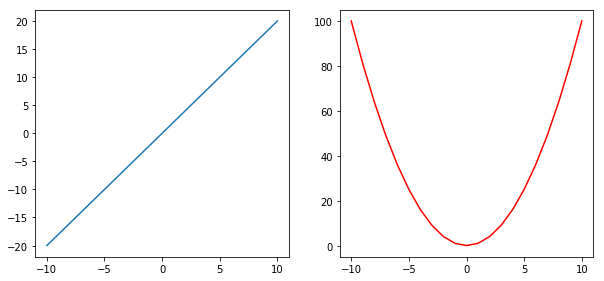

In [27]:
dy = 2*x
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x,dy)
plt.subplot(2,2,2)
plt.plot(x,y,color='red')

In [34]:
from IPython.html.widgets import *
k=np.arange(0,11)
y1 = k

def pltgradient(theta,b):
    y = theta * x + b
    plt.plot(k,y1,color='red')
    plt.plot(x,y)
    plt.show()
interact(pltgradient,theta=(0,10,0.1),b=(0,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='theta', max=10.0), FloatSlider(value=5.0, description='b', max=10.0), Output()), _dom_classes=('widget-interact',))

<function __main__.pltgradient>

[INFO] starting training...
[INFO] epoch #1, loss=124.8834398
[INFO] epoch #2, loss=124.8454302
[INFO] epoch #3, loss=124.7945864
[INFO] epoch #4, loss=124.7264468
[INFO] epoch #5, loss=124.6349704
[INFO] epoch #6, loss=124.5119816
[INFO] epoch #7, loss=124.3464306
[INFO] epoch #8, loss=124.1234228
[INFO] epoch #9, loss=123.8229707
[INFO] epoch #10, loss=123.4184389
[INFO] epoch #11, loss=122.8747024
[INFO] epoch #12, loss=122.1461488
[INFO] epoch #13, loss=121.1748623
[INFO] epoch #14, loss=119.8896844
[INFO] epoch #15, loss=118.2073566
[INFO] epoch #16, loss=116.0375309
[INFO] epoch #17, loss=113.2937304
[INFO] epoch #18, loss=109.9116103
[INFO] epoch #19, loss=105.8731471
[INFO] epoch #20, loss=101.2303830
[INFO] epoch #21, loss=96.1172343
[INFO] epoch #22, loss=90.7377962
[INFO] epoch #23, loss=85.3289398


/home/vicky/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[INFO] epoch #24, loss=80.1101638
[INFO] epoch #25, loss=75.2424292
[INFO] epoch #26, loss=70.8114838
[INFO] epoch #27, loss=66.8357994
[INFO] epoch #28, loss=63.2879788
[INFO] epoch #29, loss=60.1174245
[INFO] epoch #30, loss=57.2673353
[INFO] epoch #31, loss=54.6845910
[INFO] epoch #32, loss=52.3240301
[INFO] epoch #33, loss=50.1492895
[INFO] epoch #34, loss=48.1319526
[INFO] epoch #35, loss=46.2500991
[INFO] epoch #36, loss=44.4868240
[INFO] epoch #37, loss=42.8289633
[INFO] epoch #38, loss=41.2660905
[INFO] epoch #39, loss=39.7897644
[INFO] epoch #40, loss=38.3929851
[INFO] epoch #41, loss=37.0698078
[INFO] epoch #42, loss=35.8150724
[INFO] epoch #43, loss=34.6242154
[INFO] epoch #44, loss=33.4931392
[INFO] epoch #45, loss=32.4181204
[INFO] epoch #46, loss=31.3957456
[INFO] epoch #47, loss=30.4228644
[INFO] epoch #48, loss=29.4965555
[INFO] epoch #49, loss=28.6141010
[INFO] epoch #50, loss=27.7729657
[INFO] epoch #51, loss=26.9707811
[INFO] epoch #52, loss=26.2053318
[INFO] epoch #

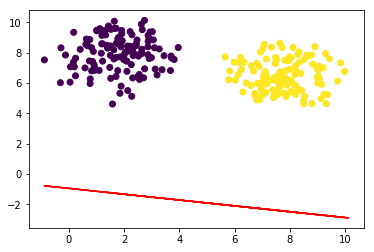

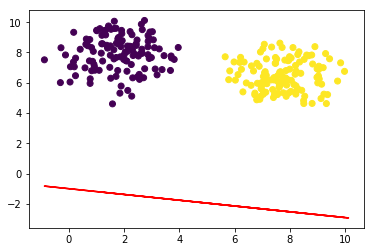

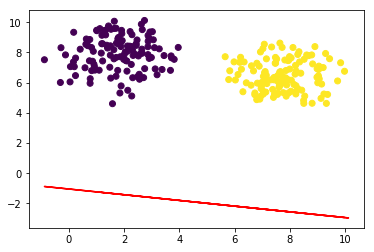

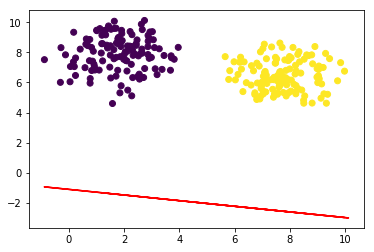

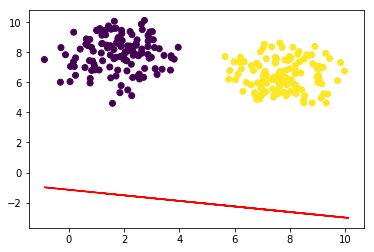

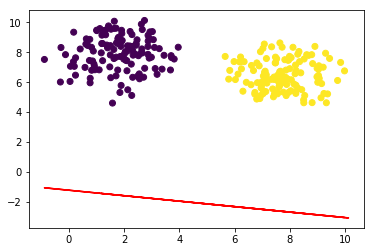

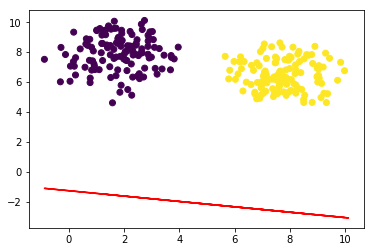

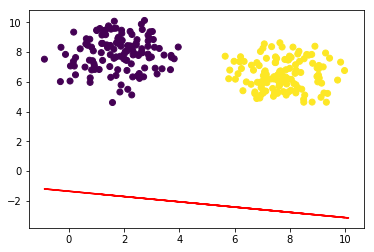

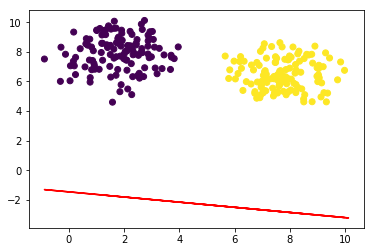

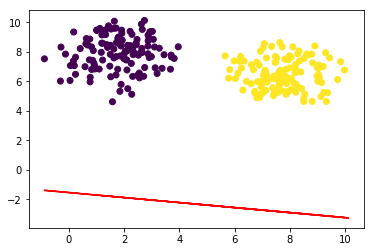

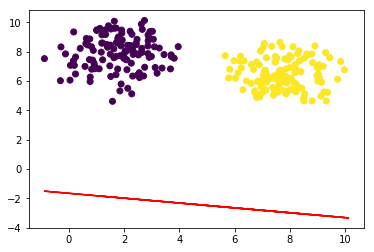

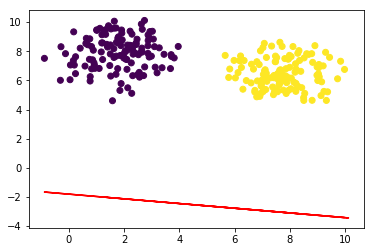

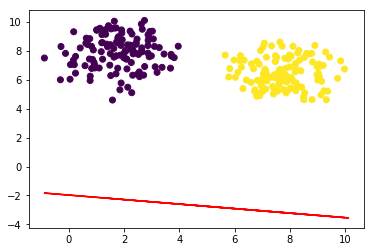

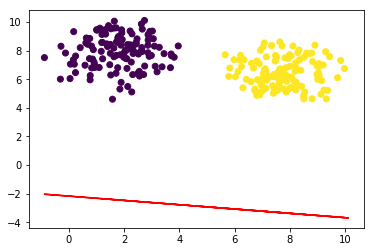

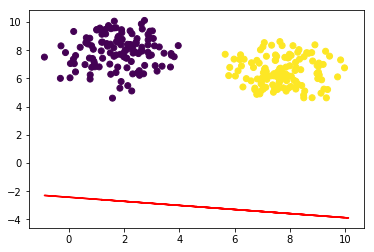

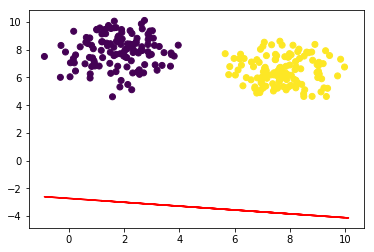

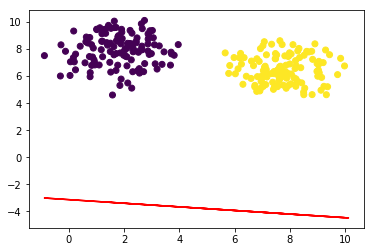

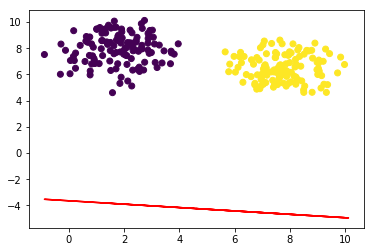

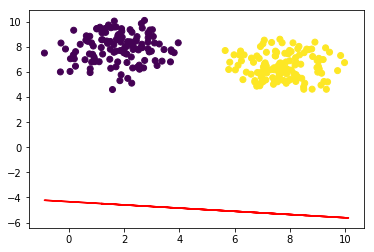

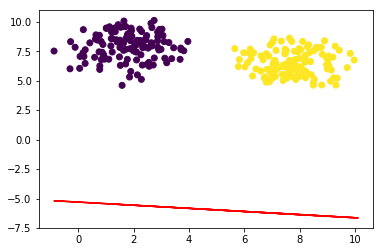

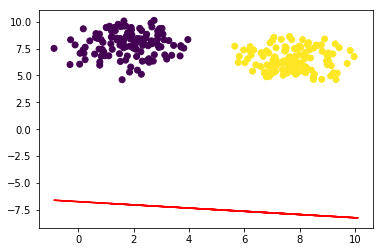

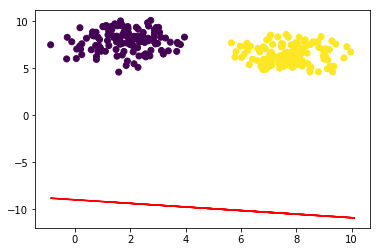

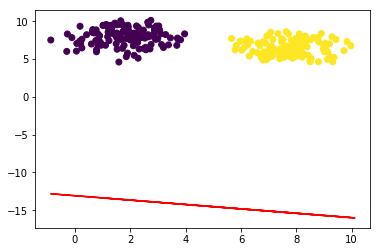

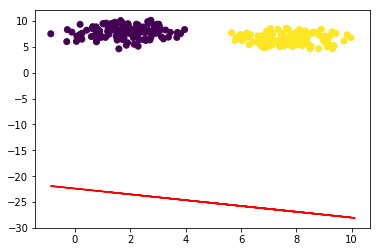

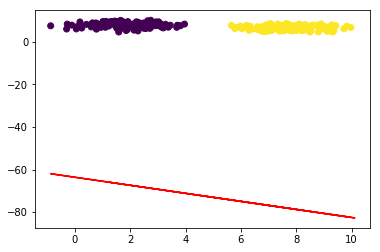

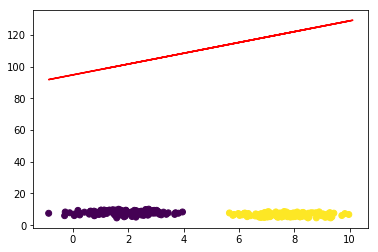

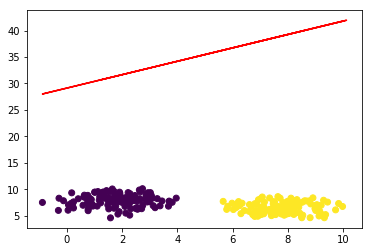

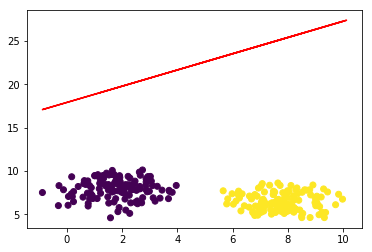

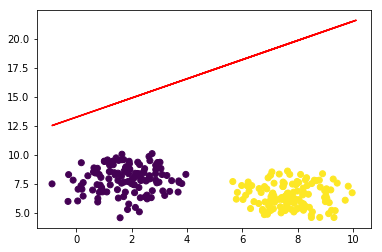

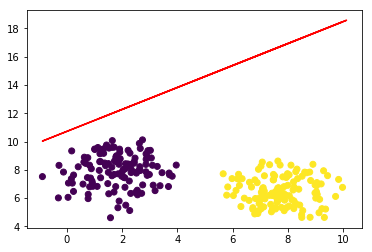

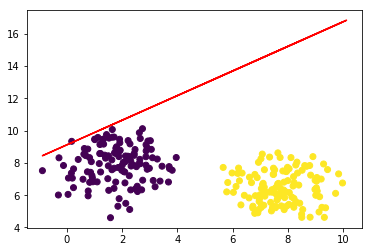

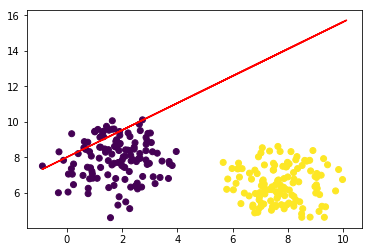

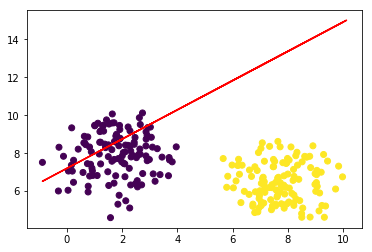

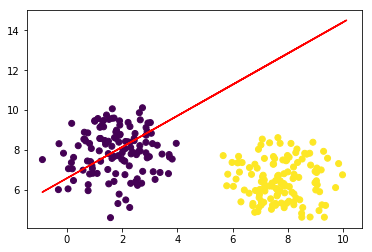

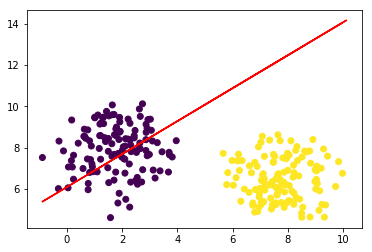

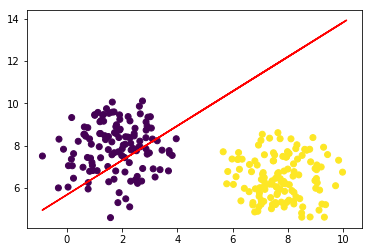

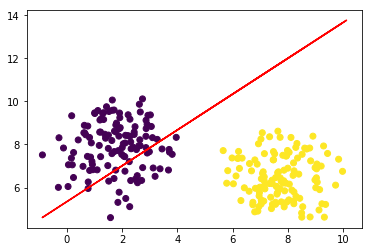

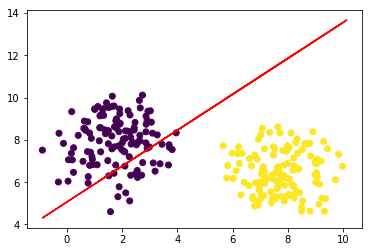

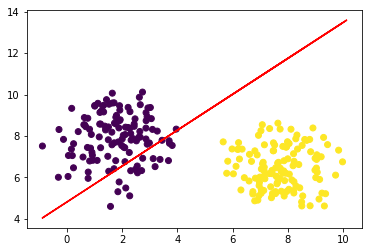

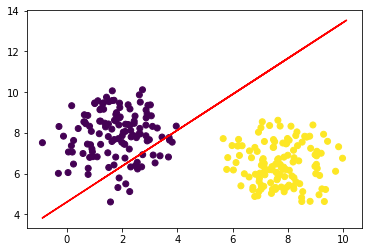

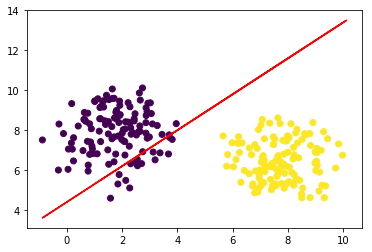

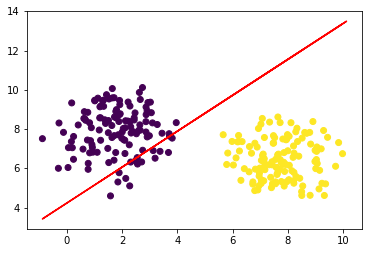

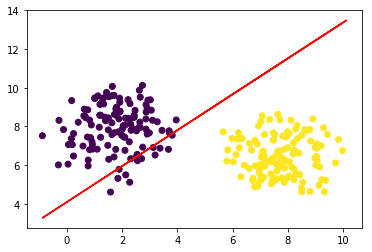

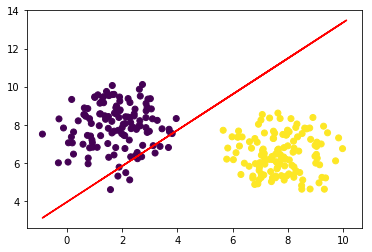

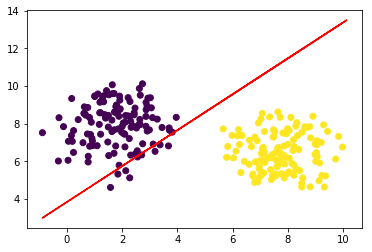

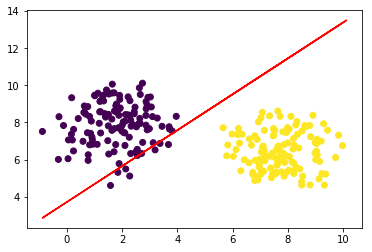

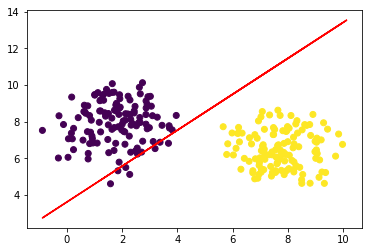

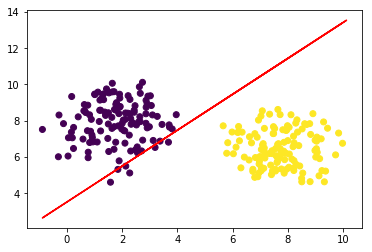

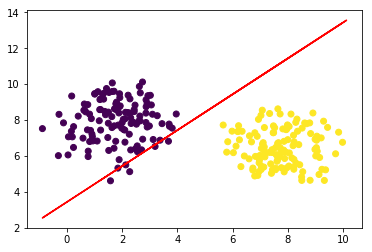

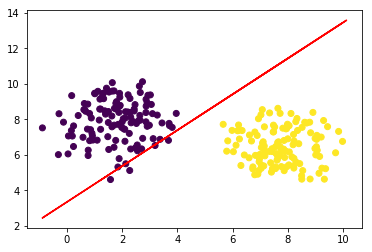

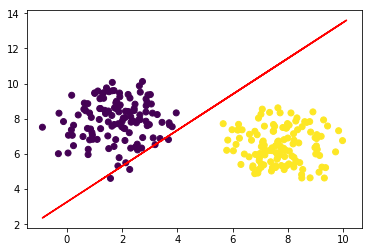

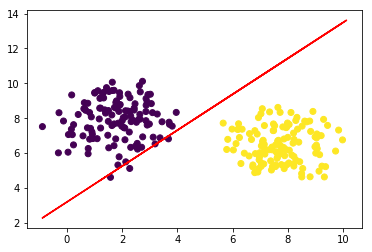

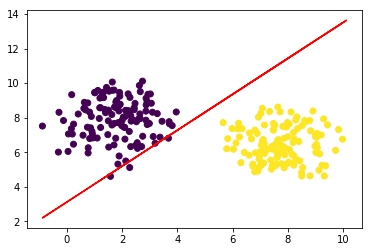

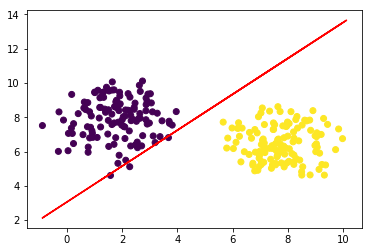

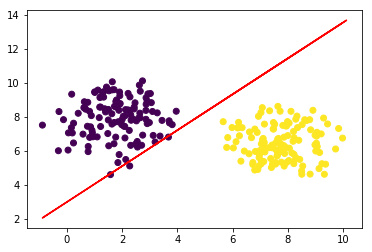

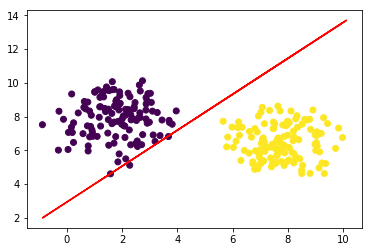

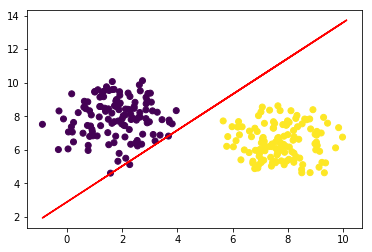

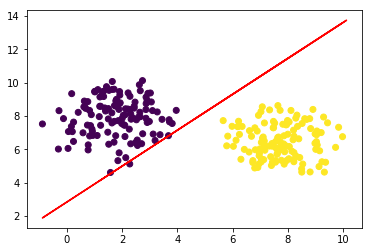

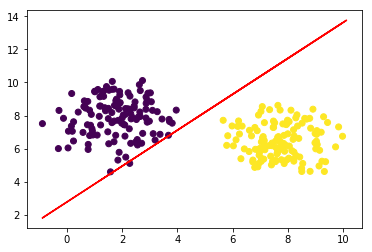

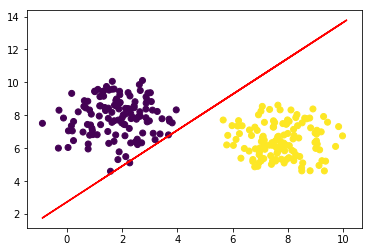

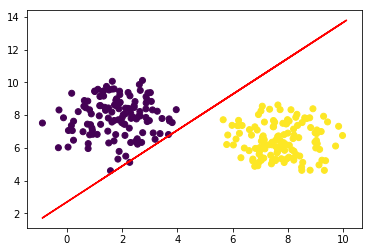

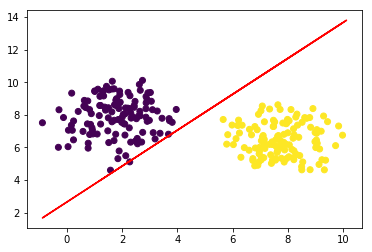

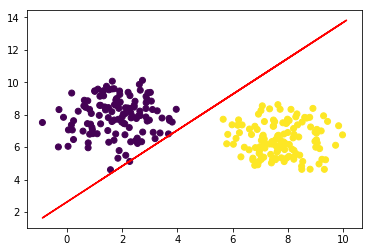

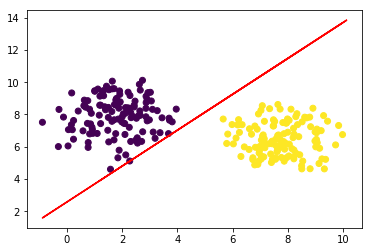

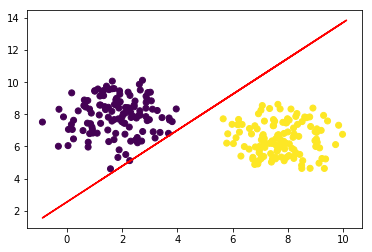

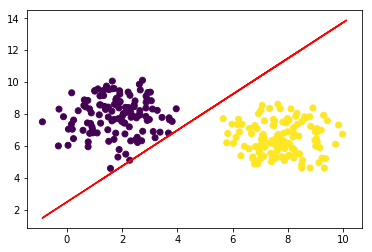

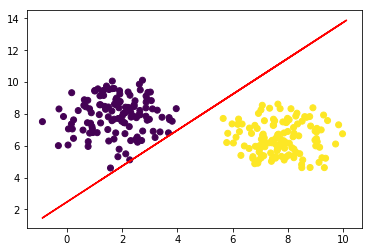

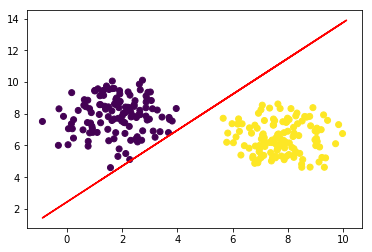

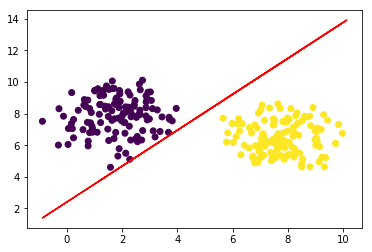

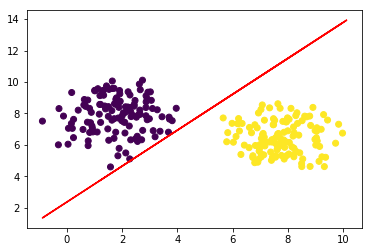

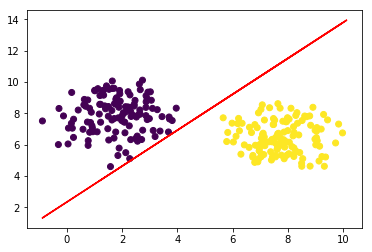

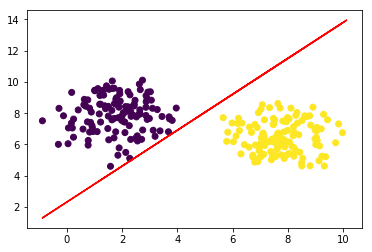

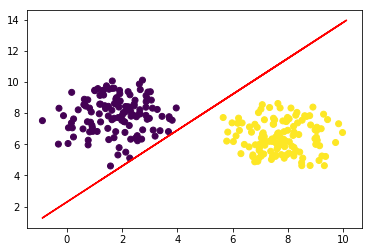

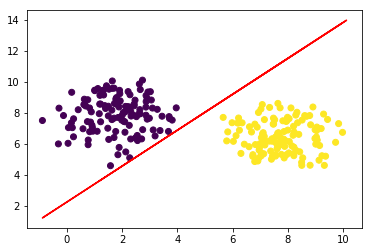

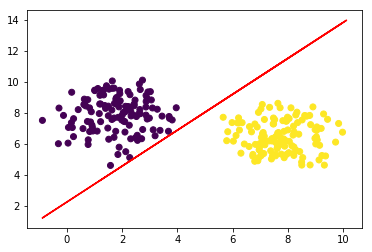

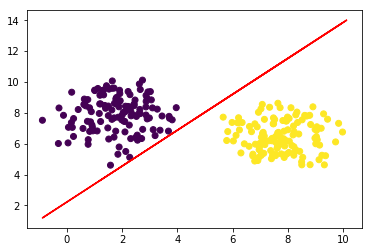

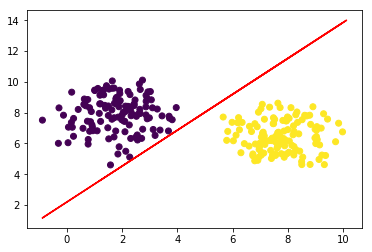

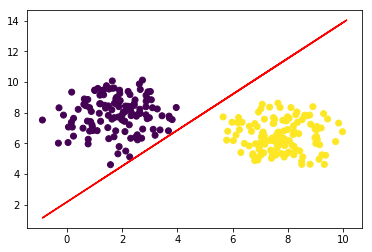

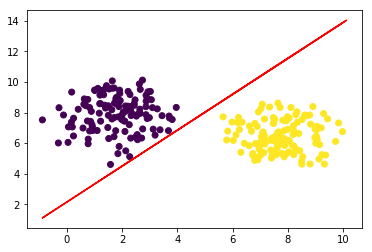

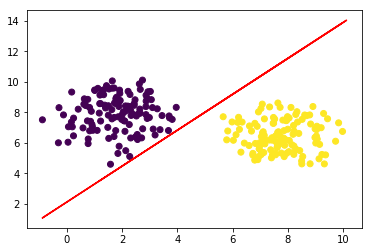

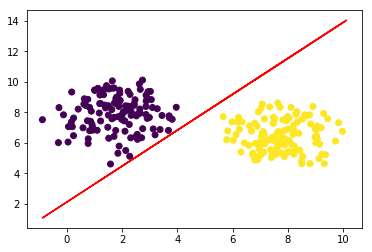

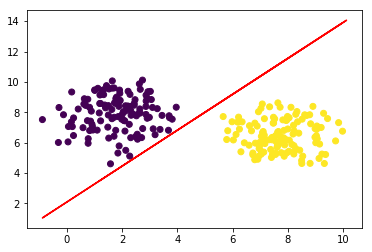

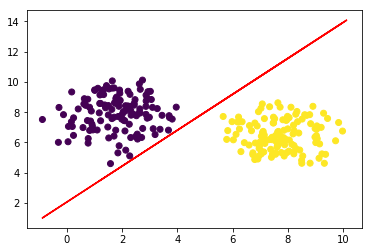

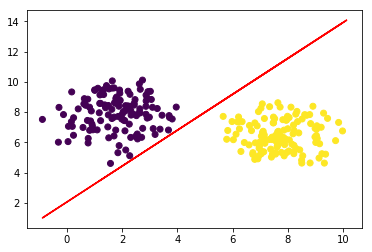

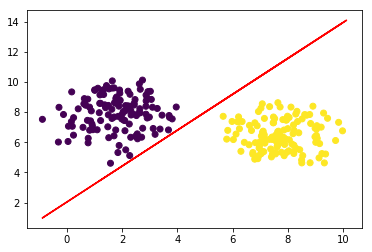

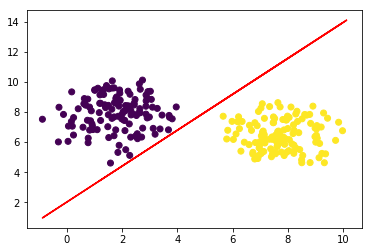

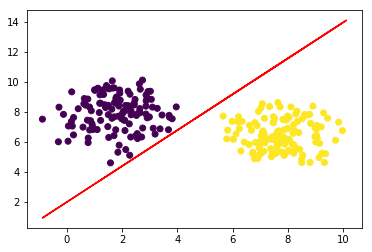

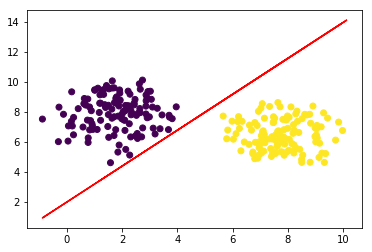

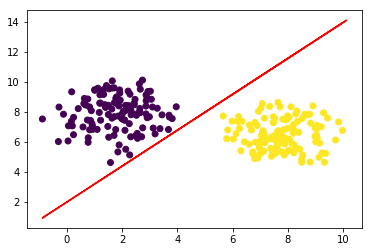

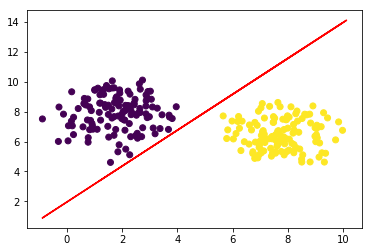

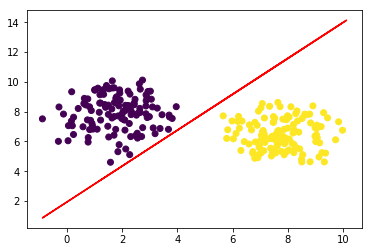

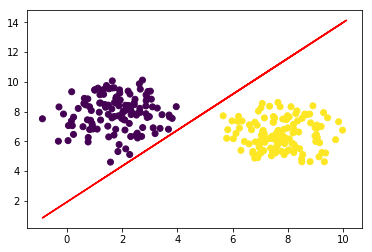

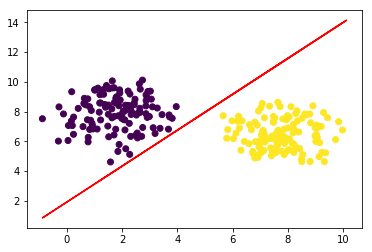

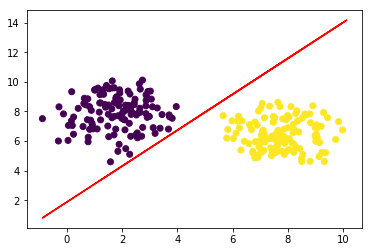

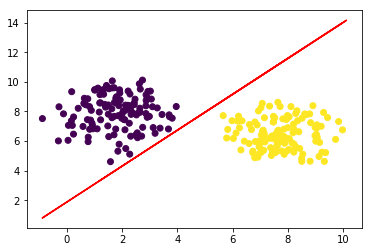

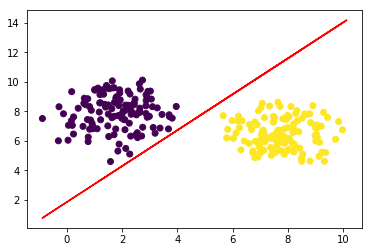

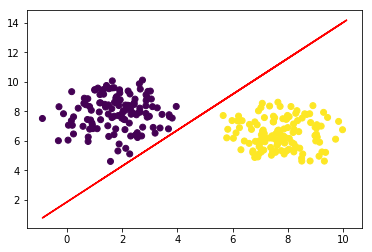

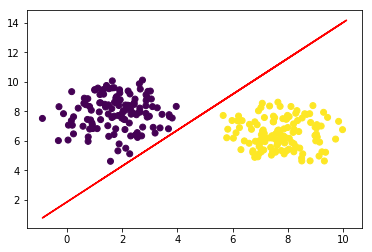

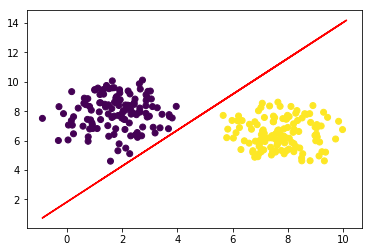

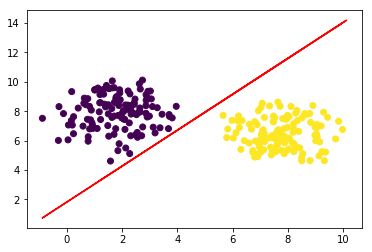

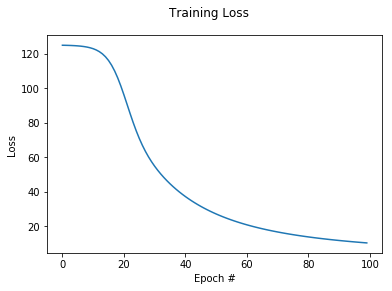

In [36]:
# Gradient descent
# USAGE
# python gradient_descent.py

# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

def sigmoid_activation(x):
    # compute and return the sigmoid activation value for a
    # given input value
    return 1.0 / (1 + np.exp(-x))


# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=250, n_features=2, centers=2,cluster_std=1.05, random_state=20)

# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]

# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

# initialize a list to store the loss value for each epoch
lossHistory = []

# loop over the desired number of epochs
for epoch in np.arange(0,100):
    # take the dot product between our features `X` and the
    # weight matrix `W`, then pass this value through the
    # sigmoid activation function, thereby giving us our
    # predictions on the dataset
    preds = sigmoid_activation(X.dot(W))

    # now that we have our predictions, we need to determine
    # our `error`, which is the difference between our predictions
    # and the true values
    error = preds - y

    # given our `error`, we can compute the total loss value as
    # the sum of squared loss -- ideally, our loss should
    # decrease as we continue training
    loss = np.sum(error ** 2)
    lossHistory.append(loss)
    print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

    # the gradient update is therefore the dot product between
    # the transpose of `X` and our error, scaled by the total
    # number of data points in `X`
    gradient = X.T.dot(error) / X.shape[0]

    # in the update stage, all we need to do is nudge our weight
    # matrix in the opposite direction of the gradient (hence the
    # term "gradient descent" by taking a small step towards a
    # set of "more optimal" parameters
    W += -0.01* gradient
    Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
    plt.figure()
    plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
    plt.plot(X, Y, "r-")
    plt.sh

# to demonstrate how to use our weight matrix as a classifier,
# let's look over our a sample of training examples
for i in np.random.choice(250, 10):
    # compute the prediction by taking the dot product of the
    # current feature vector with the weight matrix W, then
    # passing it through the sigmoid activation function
    activation = sigmoid_activation(X[i].dot(W))

    # the sigmoid function is defined over the range y=[0, 1],
    # so we can use 0.5 as our threshold -- if `activation` is
    # below 0.5, it's class `0`; otherwise it's class `1`
    label = 0 if activation < 0.5 else 1

    # show our output classification
    print("activation={:.4f}; predicted_label={}, true_label={}".format(activation, label, y[i]))

# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, 100), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

/home/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/home/vicky/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/vicky/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/vicky/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/vicky/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/vi

<IPython.core.display.Javascript object>


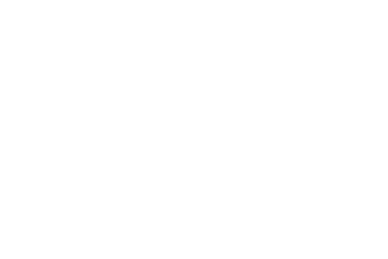

Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
frame size in pixels is 432 x 288
MovieWriter.run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 15 -i pipe: -vcodec h264 -pix_fmt yuv420p -b 1800k -metadata artist=Me -y lines.mp4


UnsupportedOperation: fileno

<IPython.core.display.Javascript object>


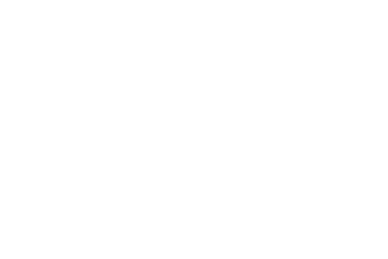

Traceback (most recent call last):
  File "/home/vicky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/vicky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/vicky/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
